In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("population_total.xlsx")
df.head()


,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,76.6M,76.4M,76.3M,76.1M,76M,75.8M,75.6M,75.4M,75.2M,74.9M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,168M,170M,172M,175M,177M,179M,182M,184M,186M,188M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.33M,1.3M,1.27M,1.25M,1.22M,1.19M,1.17M,1.14M,1.11M,1.09M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63k,62.9k,62.9k,62.8k,62.7k,62.7k,62.6k,62.5k,62.5k,62.4k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,12.3M,12.4M,12.5M,12.5M,12.6M,12.7M,12.7M,12.8M,12.8M,12.9M


In [3]:
df = df.melt(id_vars=['country'], var_name='year',value_name='population')
df

,country,year,population
0,Afghanistan,1800,3.28M
1,Angola,1800,1.57M
2,Albania,1800,400k
3,Andorra,1800,2650
4,United Arab Emirates,1800,40.2k
...,...,...,...
59292,Samoa,2100,310k
59293,Yemen,2100,53.2M
59294,South Africa,2100,79.2M
59295,Zambia,2100,81.5M


In [4]:
def convert_population(value):
    value = str(value).strip().upper()  # Ensure uppercase and remove extra spaces
    if value.endswith('M'):  # Millions
        return float(value[:-1]) * 1e6
    elif value.endswith('K'):  # Thousands
        return float(value[:-1]) * 1e3
    elif value.endswith('B'):  # Billions
        return float(value[:-1]) * 1e9
    else:  # Assume the value is already numeric
        return float(value)

# Apply the conversion function
df['population'] = df['population'].apply(convert_population)



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     59297 non-null  object 
 1   year        59297 non-null  object 
 2   population  59297 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [7]:
df['year']=df['year'].astype(int)

In [8]:
df.plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     59297 non-null  object 
 1   year        59297 non-null  int32  
 2   population  59297 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.1+ MB


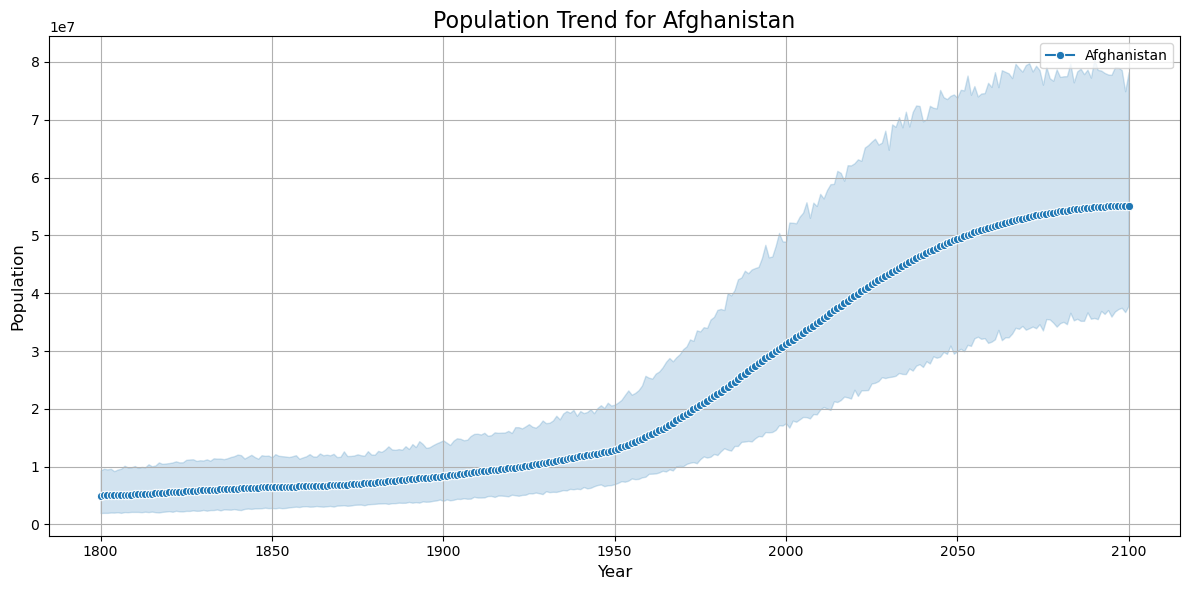

In [12]:
# Create the trend line
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='population', marker='o', label="Afghanistan")

# Add labels and title
plt.title("Population Trend for Afghanistan", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()